In [2]:
import seaborn as sns
%matplotlib inline
tips =sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


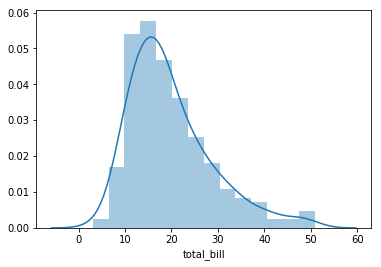

In [7]:
sns.distplot(tips['total_bill'])
#histogram with Kernel Desnity Estimation 

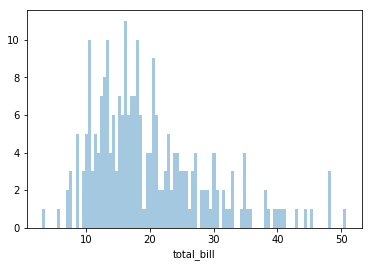

In [10]:
sns.distplot(tips['total_bill'],kde=False,bins=100)

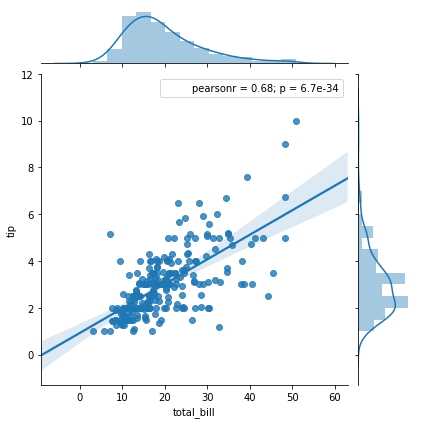

In [13]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

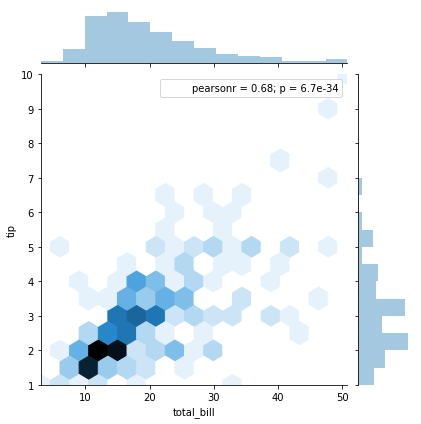

In [14]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

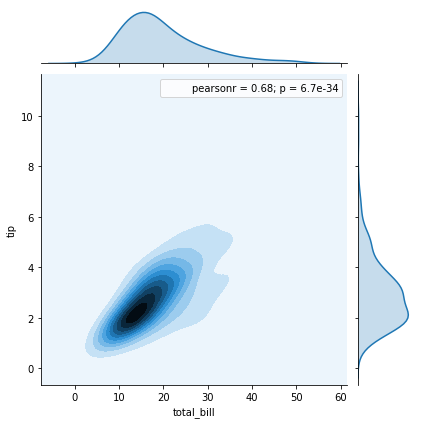

In [15]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='kde')

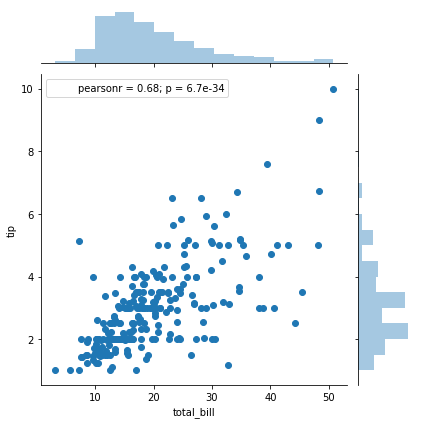

In [16]:
sns.jointplot(x='total_bill',y='tip',data=tips)

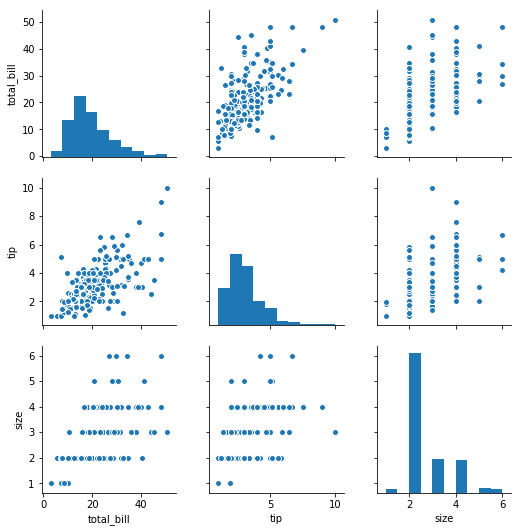

In [18]:
sns.pairplot(tips)

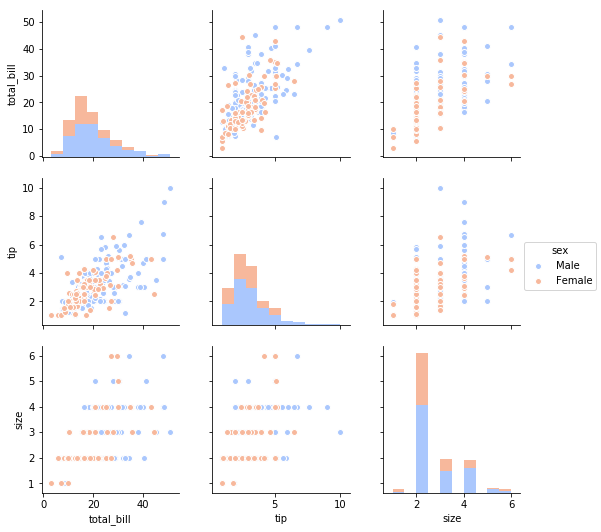

In [20]:
sns.pairplot(tips,hue='sex',palette='coolwarm')
#hue catagorical column 
#colors datapoints based off column used for hue 

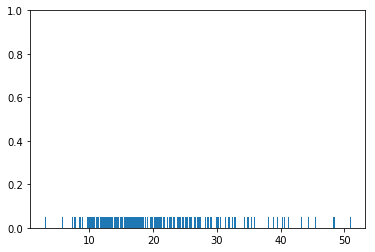

In [21]:
sns.rugplot(tips['total_bill'])

# kdeplot
kdeplots are Kernel Density Estimation plots. These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value. For example:

(0, 1)

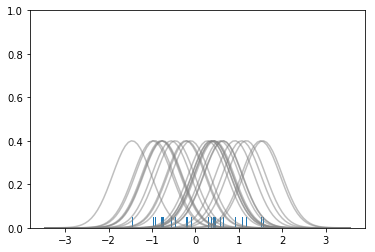

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

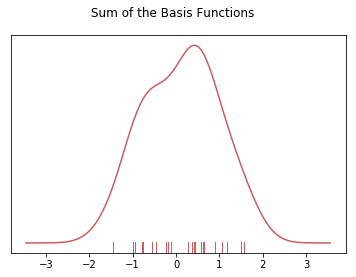

In [23]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

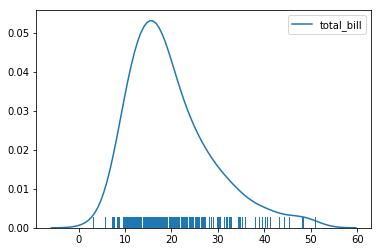

In [24]:
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])

In [ ]:
import numpy as np

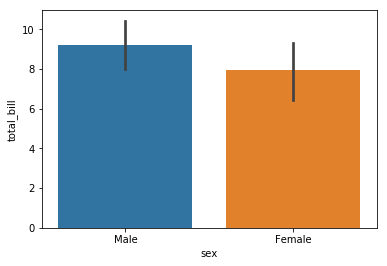

In [26]:
#visulization of group by 
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)

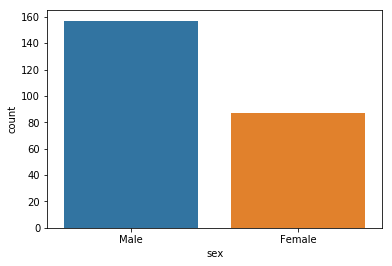

In [28]:
sns.countplot(x='sex',data=tips)

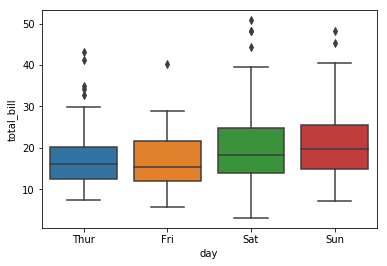

In [29]:
sns.boxplot(x='day',y='total_bill',data=tips)
#box and whisker plot 

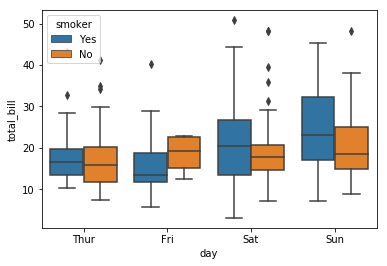

In [30]:
sns.boxplot(x='day',y='total_bill',data=tips,hue='smoker')

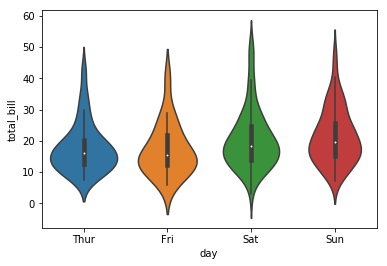

In [31]:
sns.violinplot(x='day',y='total_bill',data=tips)

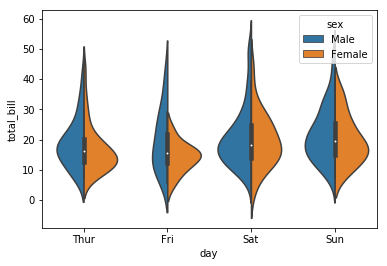

In [33]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex',split='true')

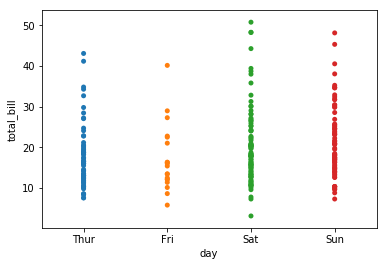

In [34]:
sns.stripplot(x='day',y='total_bill',data=tips)

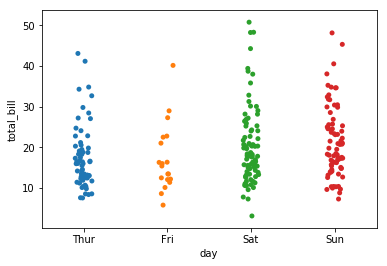

In [35]:
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True)

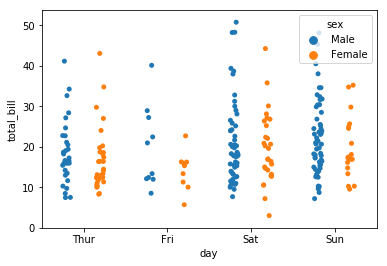

In [39]:
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True,hue='sex',dodge=True)

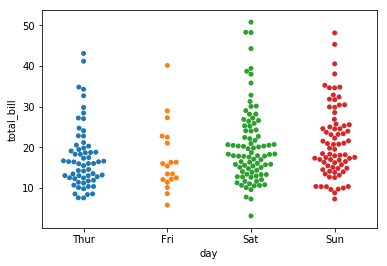

In [42]:
sns.swarmplot(x='day',y='total_bill',data=tips)
#don't scale to large #'s 

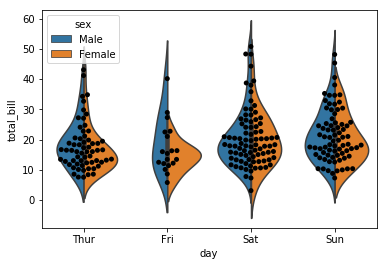

In [43]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex',split='true')
sns.swarmplot(x='day',y='total_bill',data=tips,color='black')

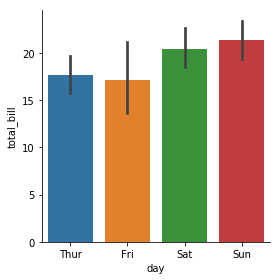

In [44]:
sns.factorplot(x='day',y='total_bill',data=tips,kind='bar')

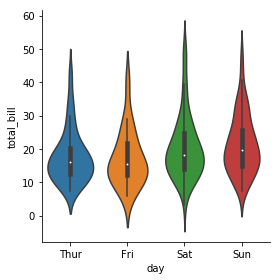

In [45]:
sns.factorplot(x='day',y='total_bill',data=tips,kind='violin')

In [46]:
flights=sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [52]:
tc = tips.corr()

In [58]:
flights.corr()

,year,passengers
year,1.000000,0.921824
passengers,0.921824,1.000000


In [54]:
tc

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


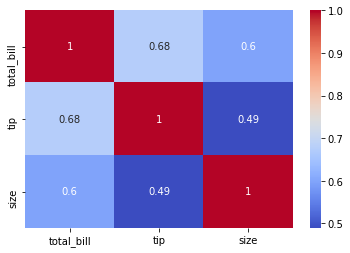

In [57]:
sns.heatmap(tc,annot=True,cmap='coolwarm')

In [61]:
fdata=flights.pivot_table(index='month',columns='year',values='passengers')


In [62]:
fdata

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


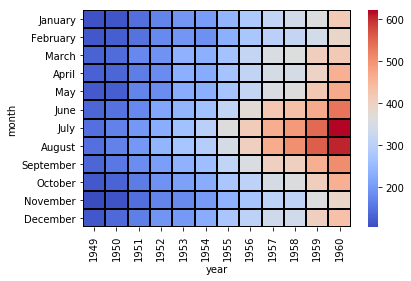

In [69]:
sns.heatmap(fdata,cmap='coolwarm',linecolor='black',linewidth=1)

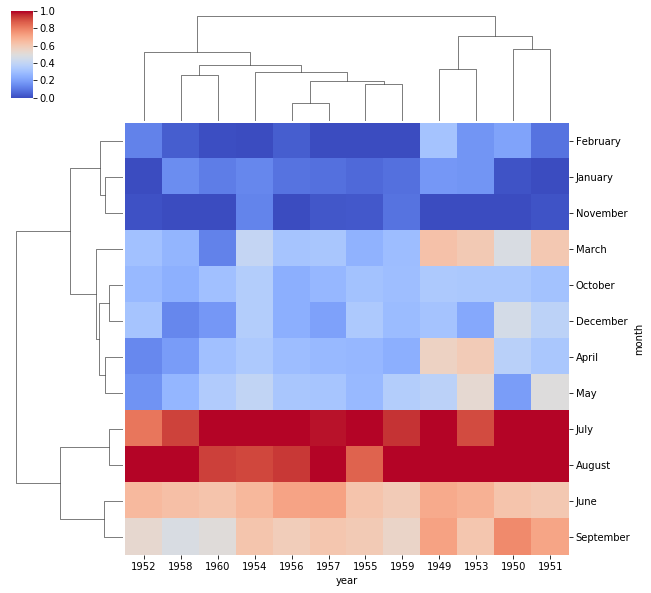

In [72]:
sns.clustermap(fdata,cmap="coolwarm",standard_scale=1)

In [73]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [74]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

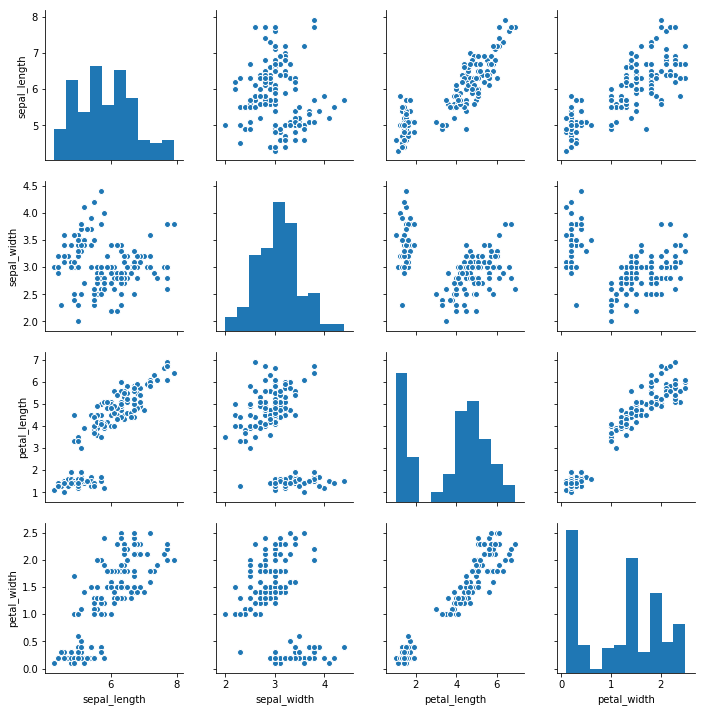

In [75]:
sns.pairplot(iris)

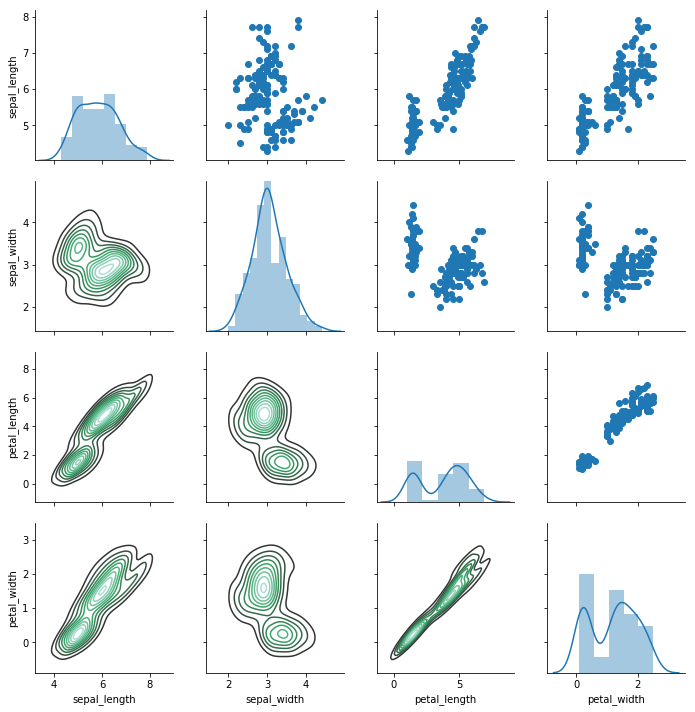

In [76]:
g=sns.PairGrid(iris)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

In [77]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


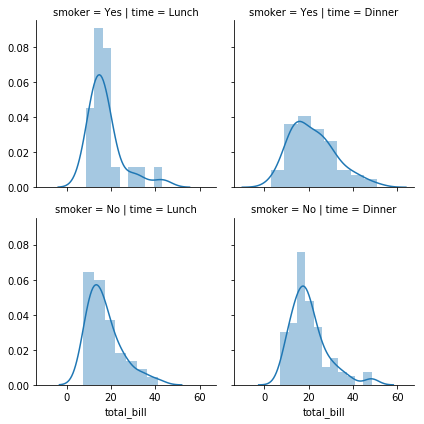

In [82]:
g = sns.FacetGrid(data=tips,col='time',row='smoker')
g.map(sns.distplot,'total_bill')

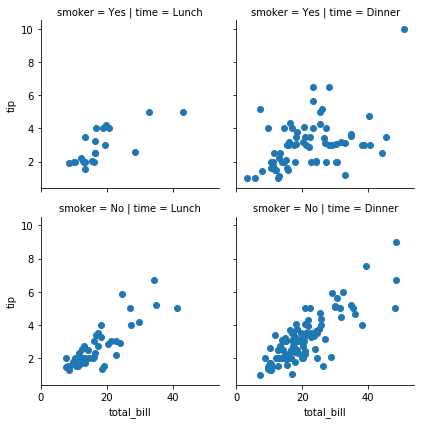

In [84]:
g = sns.FacetGrid(data=tips,col='time',row='smoker')
g.map(plt.scatter,'total_bill','tip')

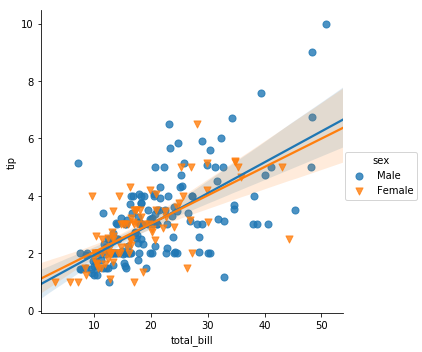

In [90]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',markers=['o','v'],scatter_kws={'s':50})

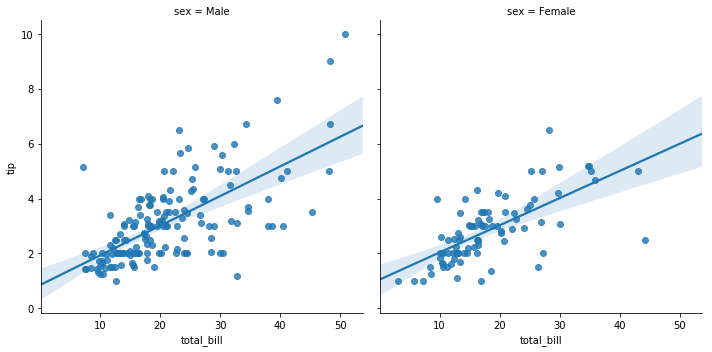

In [91]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex')

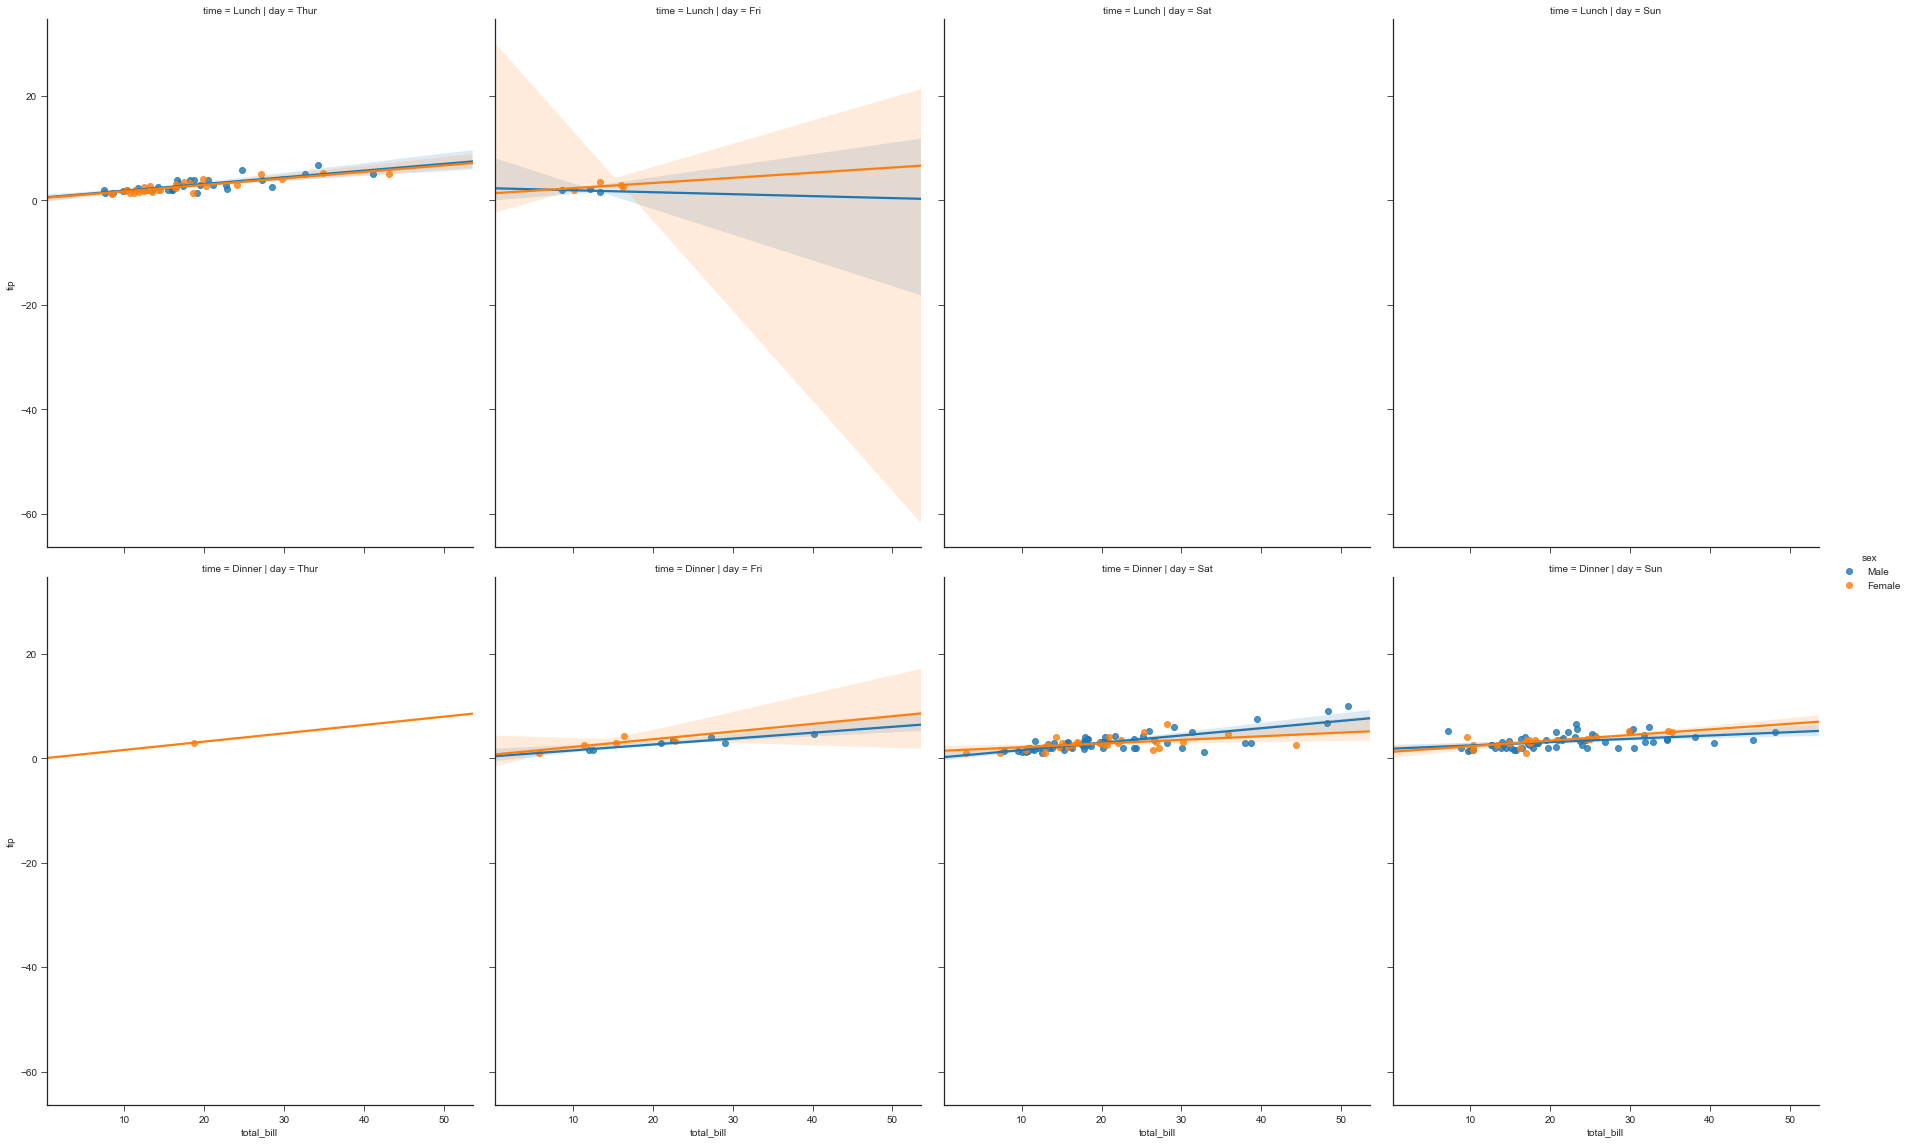

In [101]:
sns.set_style('ticks')
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',row='time',hue='sex',aspect=0.8,size=8)
sns.despine()